**Importing Basic libraries for data analysis**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
data=pd.read_csv("/kaggle/input/addition/add.csv")

In [7]:
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


In [37]:
data.shape # There are total 22 Rows and 3 Columns in dataset

(22, 3)

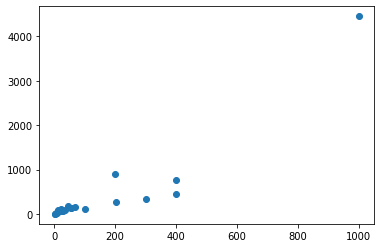

In [10]:
plt.scatter(data["x"],data["sum"])

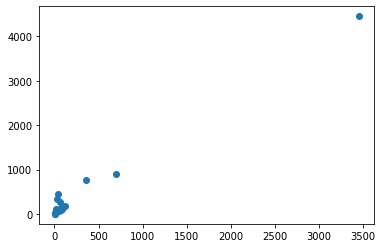

In [11]:
plt.scatter(data["y"],data["sum"])

**1.Storing Feature Matrix (Independent variables) in X and Target Vector(Dependent variables) in y**

In [12]:
X=data[["x","y"]]
y=data["sum"]

**2. Train Test split the dataset**


1. Split the data using sklearn in Train and Test dataset
2. Train the data on training set
3. Test the data on testing set

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**3. Import and Train the Model**

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

**4. Check Model's Prediction Performance**

In [16]:
lr_model.score(X_test,y_test)

1.0

**5. Comparing the results**

In [18]:
y_predicted=lr_model.predict(X_test)

In [19]:
df=pd.DataFrame({"Actual_Values":y_test,"Predicted_Values":y_predicted})
df

,Actual_Values,Predicted_Values
0,2.0,2.0
13,112.9,112.9
8,68.0,68.0
1,8.0,8.0
15,900.0,900.0
5,66.0,66.0
20,169.4,169.4


**6. Predict Values for New Variables**

In [23]:
lr_model.predict([[112.34,201.98]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([314.32])

**7. Save model using Joblib library**

**Joblib is a set of tools to provide lightweight pipelining in Python.It provides a better way to avoid recomputing the same function repetitively saving a lot of time and computational cost.**

In [24]:
import joblib

In [26]:
joblib.dump(lr_model,"linearregression_model")

['linearregression_model']

In [27]:
lr_model=joblib.load("linearregression_model")

In [28]:
lr_model.predict([[20.987,678.07]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([699.057])

**8. Tkinter**

**Tkinter is a standard library for creating the graphical user interface for desktop based applications.**

In [30]:
from tkinter import *

In [31]:
def show_entry_fields():
    p1= float(e1.get()) # Getting data from entry widget e1 , convert in float in tkinter using get method
    p2=float(e2.get()) # Getting data from entry widget e2 , convert in float in tkinter using get method
    
    model=joblib.load("lr_model") #Loading our model using joblib
    result=model.predict([p1,p2]) #Perform prediction using predict on data entered on entry widget
    
    Label(master,text="Sum is = ").grid(row=4) # For displaying text inside master and setting grid for this location
    Label(master,text=result).grid(row=5) # For displaying result and setting grid for this location
    print("Sum is ",result) #Printing result for checking purpose
    
master=Tk()  #creating Instance for Tkinter
master.title("Addition of two numbers using ML") #Giving Title for our app

label = Label(master, text = "Addition of two numbers using ML",
             bg = 'black',fg='white').grid(row=0,columnspan=2) #Giving Heading for the app and setting the background and foreground colour
            #Also give the grid for setting the location
    
Label(master,text ="Enter First Number").grid(row=1) #Give first label and give the grid location
Label(master,text ="Enter Second Number").grid(row=2)#Give second label and give the grid location

e1 =Entry(master) #Giving Entry widget e1 so that user can give number
e2= Entry(master)#Giving Entry widget e2 Entry widget so that user can give number

e1.grid(row=1,column=1) #Setting the position for e1 widget
e2.grid(row=2,column=1) #Setting the position for e2 widget

Button(master,text='Predict',command=show_entry_fields).grid() #Creating Button which when clicked will call function show_entry_fields internally and setting grid

mainloop() #To execute this form again and again

TclError: no display name and no $DISPLAY environment variable